# Calculating Public Services for Wards

Population data from: https://www.elections.in/delhi/mcd-elections/mcd-ward-list-2017.html

In [75]:
import os
import pickle
from importlib import reload
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon, box
import spatial_index_utils
from spatial_index_utils import reproject_gdf, calc_all_services_wards

In [74]:
reload(spatial_index_utils)

<module 'spatial_index_utils' from 'C:\\Users\\bwbel\\Google Drive\\slum_project\\spatial_index_python\\spatial_index_utils.py'>

In [34]:
# WGS 84 / Delhi
epsg_code = 7760

## Import Ward Population

In [35]:
ward_pop = pd.read_csv('wards_pop.csv')
ward_pop.head()

,AC No.,AC Name,Ward No.,Ward Name,Total Population,SC Population
0,55.0,TRILOKPURI,001-E,MAYUR VIHAR PHASE-I,61348,17546
1,NaN,NaN,002-E,TRILOKPURI-EAST,59678,33296
2,NaN,NaN,003-E,TRILOKPURI-WEST,64346,22075
3,NaN,NaN,004-E,NEW ASHOK NAGAR,56168,3689
4,56.0,KONDLI,005-E,KONDLI,62399,17502


## Import Wards Shapefile

In [36]:
ward_shapefile = gpd.read_file('Ward_2017_Fixed.shp')
ward_shapefile.head()

,FID,ID,AC_NO,AC_NM,WARD_NO,WARD_NAME,TOT_POP,SC_POP,NA_POP,LB,geometry
0,0,4,55,TRILOKPURI,004-E,NEW ASHOK NAGAR,None,None,None,EAST,"POLYGON ((77.29898 28.59049, 77.30123 28.59310..."
1,1,3,55,TRILOKPURI,003-E,TRILOKPURI-WEST,None,None,None,EAST,"POLYGON ((77.30900 28.60206, 77.30875 28.60177..."
2,2,1,55,TRILOKPURI,001-E,MAYUR VIHAR PHASE-I,None,None,None,EAST,"POLYGON ((77.29656 28.60533, 77.29649 28.60550..."
3,3,2,55,TRILOKPURI,002-E,TRILOKPURI-EAST,None,None,None,EAST,"POLYGON ((77.32022 28.61495, 77.32022 28.61491..."
4,4,5,56,KONDLI,005-E,DALLUPURA,None,None,None,EAST,"POLYGON ((77.31043 28.59916, 77.31016 28.59934..."


## Merge Ward Shapefile with Ward Population

In [37]:
ward_shapefile = ward_shapefile.merge(ward_pop, how='inner', left_on='WARD_NO', right_on='Ward No.')
ward_shapefile.head()

,FID,ID,AC_NO,AC_NM,WARD_NO,WARD_NAME,TOT_POP,SC_POP,NA_POP,LB,geometry,AC No.,AC Name,Ward No.,Ward Name,Total Population,SC Population
0,0,4,55,TRILOKPURI,004-E,NEW ASHOK NAGAR,None,None,None,EAST,"POLYGON ((77.29898 28.59049, 77.30123 28.59310...",NaN,NaN,004-E,NEW ASHOK NAGAR,56168,3689
1,1,3,55,TRILOKPURI,003-E,TRILOKPURI-WEST,None,None,None,EAST,"POLYGON ((77.30900 28.60206, 77.30875 28.60177...",NaN,NaN,003-E,TRILOKPURI-WEST,64346,22075
2,2,1,55,TRILOKPURI,001-E,MAYUR VIHAR PHASE-I,None,None,None,EAST,"POLYGON ((77.29656 28.60533, 77.29649 28.60550...",55.0,TRILOKPURI,001-E,MAYUR VIHAR PHASE-I,61348,17546
3,3,2,55,TRILOKPURI,002-E,TRILOKPURI-EAST,None,None,None,EAST,"POLYGON ((77.32022 28.61495, 77.32022 28.61491...",NaN,NaN,002-E,TRILOKPURI-EAST,59678,33296
4,4,5,56,KONDLI,005-E,DALLUPURA,None,None,None,EAST,"POLYGON ((77.31043 28.59916, 77.31016 28.59934...",56.0,KONDLI,005-E,KONDLI,62399,17502


In [38]:
# WARD_NO is the unique ID
len(ward_shapefile['WARD_NO'].unique())

272

In [44]:
ward_shapefile.columns

Index(['FID', 'ID', 'AC_NO', 'AC_NM', 'WARD_NO', 'WARD_NAME', 'TOT_POP',
       'SC_POP', 'NA_POP', 'LB', 'geometry', 'AC No.', 'AC Name', 'Ward No.',
       'Ward Name', 'Total Population', 'SC Population', 'geom_type', 'index'],
      dtype='object')

## Check Validity of Ward Shapefile

In [39]:
# boundary of Delhi
delhi_bounds_filepath = os.path.join('shapefiles', 'delhi_bounds_buffer.shp')

In [40]:
spatial_index_utils.check_shapefile(gdf=ward_shapefile, gdf_name='wards', 
                                    geom_type='Polygon', 
                                    delhi_bounds_filepath=delhi_bounds_filepath)

wards has duplicate rows: False
----------------------------------------------------
rows with invalid geometries 

----------------------------------------------------
all geometries in wards are of type Polygon: True
----------------------------------------------------
Rows with None value in geometry column are below
Empty GeoDataFrame
Columns: [FID, ID, AC_NO, AC_NM, WARD_NO, WARD_NAME, TOT_POP, SC_POP, NA_POP, LB, geometry, AC No., AC Name, Ward No., Ward Name, Total Population, SC Population, geom_type]
Index: []
----------------------------------------------------
wards shapefile is contained within Delhi: True
----------------------------------------------------
Done with shapefile evaluation


## Create index column

In [42]:
ward_shapefile['index'] = ward_shapefile.index

In [43]:
ward_shapefile.head()

,FID,ID,AC_NO,AC_NM,WARD_NO,WARD_NAME,TOT_POP,SC_POP,NA_POP,LB,geometry,AC No.,AC Name,Ward No.,Ward Name,Total Population,SC Population,geom_type,index
0,0,4,55,TRILOKPURI,004-E,NEW ASHOK NAGAR,None,None,None,EAST,"POLYGON ((77.29898 28.59049, 77.30123 28.59310...",NaN,NaN,004-E,NEW ASHOK NAGAR,56168,3689,<class 'geopandas.geoseries.GeoSeries'>,0
1,1,3,55,TRILOKPURI,003-E,TRILOKPURI-WEST,None,None,None,EAST,"POLYGON ((77.30900 28.60206, 77.30875 28.60177...",NaN,NaN,003-E,TRILOKPURI-WEST,64346,22075,<class 'geopandas.geoseries.GeoSeries'>,1
2,2,1,55,TRILOKPURI,001-E,MAYUR VIHAR PHASE-I,None,None,None,EAST,"POLYGON ((77.29656 28.60533, 77.29649 28.60550...",55.0,TRILOKPURI,001-E,MAYUR VIHAR PHASE-I,61348,17546,<class 'geopandas.geoseries.GeoSeries'>,2
3,3,2,55,TRILOKPURI,002-E,TRILOKPURI-EAST,None,None,None,EAST,"POLYGON ((77.32022 28.61495, 77.32022 28.61491...",NaN,NaN,002-E,TRILOKPURI-EAST,59678,33296,<class 'geopandas.geoseries.GeoSeries'>,3
4,4,5,56,KONDLI,005-E,DALLUPURA,None,None,None,EAST,"POLYGON ((77.31043 28.59916, 77.31016 28.59934...",56.0,KONDLI,005-E,KONDLI,62399,17502,<class 'geopandas.geoseries.GeoSeries'>,4


## Import services shapefiles

In [52]:
# Define filepaths

services_dir = os.path.join('shapefiles', 'Spatial_Index_GIS', 'Public Services')

bank_fp = os.path.join(services_dir, 'Banking', 'Banking.shp')
health_fp = os.path.join(services_dir, 'Health', 'Health.shp')
road_fp = os.path.join(services_dir, 'Major Road', 'Road.shp')
police_fp = os.path.join(services_dir, 'Police', 'Police Station.shp')
ration_fp = os.path.join(services_dir, 'Ration', 'Ration.shp')
school_fp = os.path.join(services_dir, 'School', 'schools7760.shp')
transport_fp = os.path.join(services_dir, 'Transport', 'Transport.shp')

# boundary of Delhi
delhi_bounds_filepath = os.path.join('shapefiles', 'delhi_bounds_buffer.shp')

# Check that all filepaths exist
filepath_list = [bank_fp, health_fp, road_fp, police_fp, ration_fp, school_fp, transport_fp, delhi_bounds_filepath]

for filepath in filepath_list:
    if not os.path.exists(filepath):
        print('{} does not exist'.format(filepath))
        
# Import services
bank = gpd.read_file(bank_fp)
health = gpd.read_file(health_fp)
road = gpd.read_file(road_fp)
police = gpd.read_file(police_fp)
ration = gpd.read_file(ration_fp)
school = gpd.read_file(school_fp)
transport = gpd.read_file(transport_fp)

## Reproject everything to EPSG 7760

In [55]:
ward_shapefile = reproject_gdf(ward_shapefile, epsg_code)

GeoDataFrame now has the following CRS:

PROJCRS["WGS 84 / Delhi",BASEGEOGCRS["WGS 84",DATUM["World Geodetic System 1984",ELLIPSOID["WGS 84",6378137,298.257223563,LENGTHUNIT["metre",1]]],PRIMEM["Greenwich",0,ANGLEUNIT["degree",0.0174532925199433]],ID["EPSG",4326]],CONVERSION["Delhi NSF LCC",METHOD["Lambert Conic Conformal (2SP)",ID["EPSG",9802]],PARAMETER["Latitude of false origin",28.62510126,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8821]],PARAMETER["Longitude of false origin",77,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8822]],PARAMETER["Latitude of 1st standard parallel",28.375,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8823]],PARAMETER["Latitude of 2nd standard parallel",28.875,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8824]],PARAMETER["Easting at false origin",1000000,LENGTHUNIT["metre",1],ID["EPSG",8826]],PARAMETER["Northing at false origin",1000000,LENGTHUNIT["metre",1],ID["EPSG",8827]]],CS[Cartesian,2],AXIS["easting (X)",east,ORDER[1],LENGTHUNIT["met

In [56]:
bank.crs == health.crs == road.crs == police.crs == ration.crs == school.crs == transport.crs == ward_shapefile.crs

True

## Test Service Index for Wards

In [57]:
create_service_index_wards(polygon_gdf=ward_shapefile,
                           point_gdf=health,
                           service_name='health',
                           epsg_code=epsg_code)

GeoDataFrame now has the following CRS:

epsg:7760


,FID,ID,AC_NO,AC_NM,WARD_NO,WARD_NAME,TOT_POP,SC_POP,NA_POP,LB,...,AC Name,Ward No.,Ward Name,Total Population,SC Population,geom_type,index,health_count,health_pcen,health_idx
0,0,4,55,TRILOKPURI,004-E,NEW ASHOK NAGAR,None,None,None,EAST,...,NaN,004-E,NEW ASHOK NAGAR,56168,3689,<class 'geopandas.geoseries.GeoSeries'>,0,1,0.000018,0.145560
1,1,3,55,TRILOKPURI,003-E,TRILOKPURI-WEST,None,None,None,EAST,...,NaN,003-E,TRILOKPURI-WEST,64346,22075,<class 'geopandas.geoseries.GeoSeries'>,1,2,0.000031,0.254121
2,2,1,55,TRILOKPURI,001-E,MAYUR VIHAR PHASE-I,None,None,None,EAST,...,TRILOKPURI,001-E,MAYUR VIHAR PHASE-I,61348,17546,<class 'geopandas.geoseries.GeoSeries'>,2,1,0.000016,0.133270
3,3,2,55,TRILOKPURI,002-E,TRILOKPURI-EAST,None,None,None,EAST,...,NaN,002-E,TRILOKPURI-EAST,59678,33296,<class 'geopandas.geoseries.GeoSeries'>,3,1,0.000017,0.136999
4,4,5,56,KONDLI,005-E,DALLUPURA,None,None,None,EAST,...,KONDLI,005-E,KONDLI,62399,17502,<class 'geopandas.geoseries.GeoSeries'>,4,1,0.000016,0.131025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,267,100,25,MOTI NAGAR,100-N,MOTI NAGAR,None,None,None,NORTH,...,NaN,100-N,MOTI NAGAR,59963,4333,<class 'geopandas.geoseries.GeoSeries'>,267,2,0.000033,0.272696
268,268,104,39,RAJINDER NAGAR,104-N,NARAINA,None,None,None,NORTH,...,NaN,104-N,NARAINA,80240,15689,<class 'geopandas.geoseries.GeoSeries'>,268,1,0.000012,0.101892
269,269,103,39,RAJINDER NAGAR,103-N,INDER PURI,None,None,None,NORTH,...,NaN,103-N,INDER PURI,65425,20479,<class 'geopandas.geoseries.GeoSeries'>,269,1,0.000015,0.124965
270,270,102,39,RAJINDER NAGAR,102-N,RAJINDER NAGAR,None,None,None,NORTH,...,RAJINDER NAGAR,102-N,RAJINDER NAGAR,56402,7788,<class 'geopandas.geoseries.GeoSeries'>,270,1,0.000018,0.144956


## Define Point and Line Services

In [58]:
# Define all point services as dictionary
# makes it easier to calculate all point
# services with one function
point_services = {'bank': bank,
                  'health': health,
                  'police': police,
                  'ration': ration,
                  'school': school,
                  'transport': transport}

line_services = {'road': road}

In [77]:
ward_idx = calc_all_services_wards(ward_shapefile, point_services, line_services, epsg_code)

GeoDataFrame now has the following CRS:

epsg:7760
bank service index is completed
--------------------------------------------------------
GeoDataFrame now has the following CRS:

epsg:7760
health service index is completed
--------------------------------------------------------
GeoDataFrame now has the following CRS:

epsg:7760
police service index is completed
--------------------------------------------------------
GeoDataFrame now has the following CRS:

epsg:7760
ration service index is completed
--------------------------------------------------------
GeoDataFrame now has the following CRS:

epsg:7760
school service index is completed
--------------------------------------------------------
GeoDataFrame now has the following CRS:

epsg:7760
transport service index is completed
--------------------------------------------------------
all point services completed
GeoDataFrame now has the following CRS:

epsg:7760
road service is completed


In [78]:
ward_idx.head()

,FID,ID,AC_NO,AC_NM,WARD_NO,WARD_NAME,TOT_POP,SC_POP,NA_POP,LB,...,ration_idx,school_count,school_pcen,school_idx,transport_count,transport_pcen,transport_idx,road_count,road_pcen,road_idx
0,0,4,55,TRILOKPURI,004-E,NEW ASHOK NAGAR,None,None,None,EAST,...,0.175233,4,0.000071,0.099107,1,0.000018,0.008551,1.449313,0.000026,0.024171
1,1,3,55,TRILOKPURI,003-E,TRILOKPURI-WEST,None,None,None,EAST,...,0.267684,5,0.000078,0.108139,1,0.000016,0.007464,5.102390,0.000079,0.074279
2,2,1,55,TRILOKPURI,001-E,MAYUR VIHAR PHASE-I,None,None,None,EAST,...,0.481312,18,0.000293,0.408326,9,0.000147,0.070463,1.735704,0.000028,0.026503
3,3,2,55,TRILOKPURI,002-E,TRILOKPURI-EAST,None,None,None,EAST,...,0.577244,13,0.000218,0.303155,3,0.000050,0.024145,3.165265,0.000053,0.049684
4,4,5,56,KONDLI,005-E,DALLUPURA,None,None,None,EAST,...,0.039434,11,0.000176,0.245330,17,0.000272,0.130856,8.781155,0.000141,0.131823


## Visualizing Results

## Ration Shops

In [95]:
ward_idx.groupby('ration_count').size()

ration_count
0      3
1      7
2      7
3     21
4     28
5     31
6     24
7     35
8     24
9     20
10    16
11    16
12    13
13    14
14     5
15     4
17     2
18     1
24     1
dtype: int64

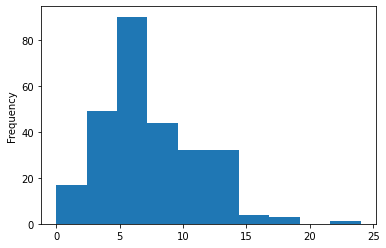

In [94]:
ward_idx['ration_count'].plot(kind='hist')

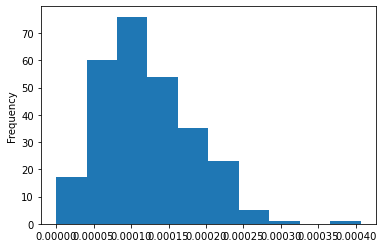

In [96]:
ward_idx['ration_pcen'].plot(kind='hist')

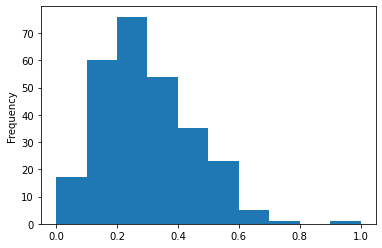

In [79]:
ward_idx['ration_idx'].plot(kind='hist')

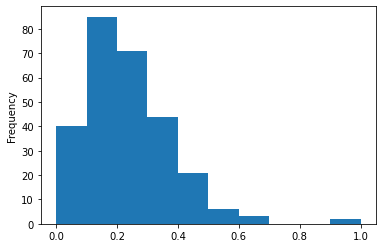

In [80]:
ward_idx['school_idx'].plot(kind='hist')

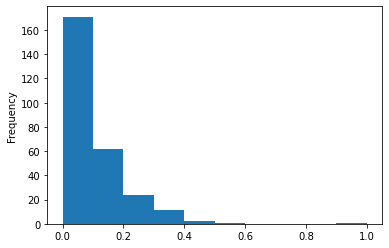

In [81]:
ward_idx['bank_idx'].plot(kind='hist')

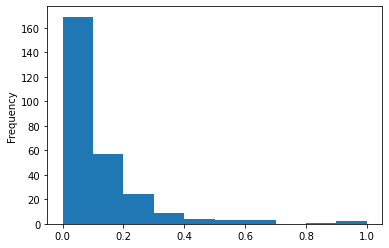

In [82]:
ward_idx['road_idx'].plot(kind='hist')

## Health

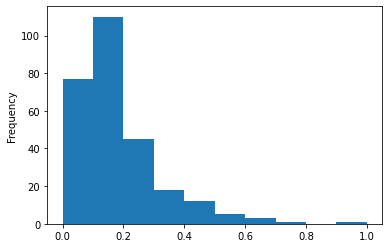

In [83]:
ward_idx['health_idx'].plot(kind='hist')

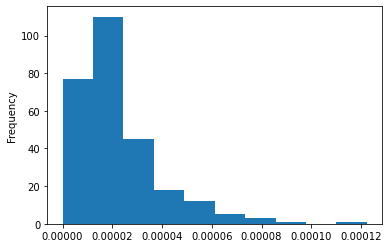

In [92]:
ward_idx['health_pcen'].plot(kind='hist')

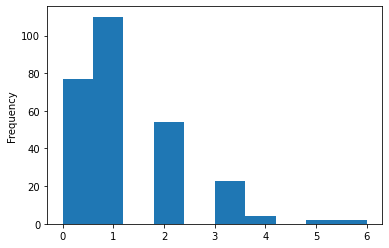

In [93]:
ward_idx['health_count'].plot(kind='hist')

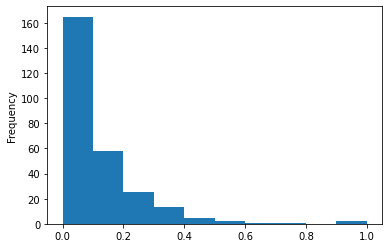

In [84]:
ward_idx['transport_idx'].plot(kind='hist')

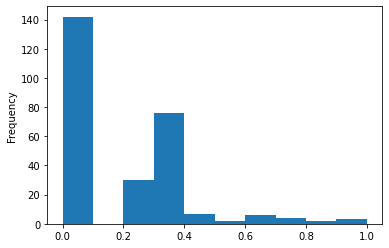

In [85]:
ward_idx['police_idx'].plot(kind='hist')

In [87]:
ward_idx['health_count'].unique()

array([1, 2, 0, 3, 6, 4, 5])

In [90]:
ward_idx.groupby('health_count').size()

health_count
0     77
1    110
2     54
3     23
4      4
5      2
6      2
dtype: int64

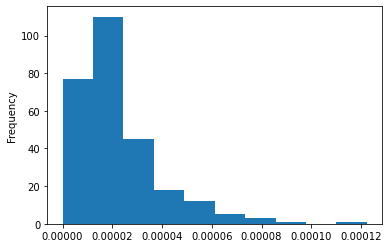

In [89]:
ward_idx['Total Population'].describe()

count      272.000000
mean     60362.731618
std       7304.196995
min      41674.000000
25%      55137.750000
50%      60130.000000
75%      64996.500000
max      83645.000000
Name: Total Population, dtype: float64

## Buffer 
* Pretend there is only one number (not creating multiple variables)
* No neighbors (like ward)

In [99]:
ward_shapefile['buffer'] = ward_shapefile.buffer(1000)

In [100]:
ward_shapefile.head()

,FID,ID,AC_NO,AC_NM,WARD_NO,WARD_NAME,TOT_POP,SC_POP,NA_POP,LB,...,AC No.,AC Name,Ward No.,Ward Name,Total Population,SC Population,geom_type,index,road_length,buffer
0,0,4,55,TRILOKPURI,004-E,NEW ASHOK NAGAR,None,None,None,EAST,...,NaN,NaN,004-E,NEW ASHOK NAGAR,56168,3689,<class 'geopandas.geoseries.GeoSeries'>,0,1.449313,"POLYGON ((1028349.123 995758.895, 1028311.803 ..."
1,1,3,55,TRILOKPURI,003-E,TRILOKPURI-WEST,None,None,None,EAST,...,NaN,NaN,003-E,TRILOKPURI-WEST,64346,22075,<class 'geopandas.geoseries.GeoSeries'>,1,5.102390,"POLYGON ((1027984.440 996399.002, 1027972.012 ..."
2,2,1,55,TRILOKPURI,001-E,MAYUR VIHAR PHASE-I,None,None,None,EAST,...,55.0,TRILOKPURI,001-E,MAYUR VIHAR PHASE-I,61348,17546,<class 'geopandas.geoseries.GeoSeries'>,2,1.735704,"POLYGON ((1027872.024 998109.458, 1027830.143 ..."
3,3,2,55,TRILOKPURI,002-E,TRILOKPURI-EAST,None,None,None,EAST,...,NaN,NaN,002-E,TRILOKPURI-EAST,59678,33296,<class 'geopandas.geoseries.GeoSeries'>,3,3.165265,"POLYGON ((1029069.586 998648.297, 1029071.687 ..."
4,4,5,56,KONDLI,005-E,DALLUPURA,None,None,None,EAST,...,56.0,KONDLI,005-E,KONDLI,62399,17502,<class 'geopandas.geoseries.GeoSeries'>,4,8.781155,"POLYGON ((1029619.124 998346.257, 1029645.668 ..."


# Save file

In [102]:
ward_idx.head()

,FID,ID,AC_NO,AC_NM,WARD_NO,WARD_NAME,TOT_POP,SC_POP,NA_POP,LB,...,ration_idx,school_count,school_pcen,school_idx,transport_count,transport_pcen,transport_idx,road_count,road_pcen,road_idx
0,0,4,55,TRILOKPURI,004-E,NEW ASHOK NAGAR,None,None,None,EAST,...,0.175233,4,0.000071,0.099107,1,0.000018,0.008551,1.449313,0.000026,0.024171
1,1,3,55,TRILOKPURI,003-E,TRILOKPURI-WEST,None,None,None,EAST,...,0.267684,5,0.000078,0.108139,1,0.000016,0.007464,5.102390,0.000079,0.074279
2,2,1,55,TRILOKPURI,001-E,MAYUR VIHAR PHASE-I,None,None,None,EAST,...,0.481312,18,0.000293,0.408326,9,0.000147,0.070463,1.735704,0.000028,0.026503
3,3,2,55,TRILOKPURI,002-E,TRILOKPURI-EAST,None,None,None,EAST,...,0.577244,13,0.000218,0.303155,3,0.000050,0.024145,3.165265,0.000053,0.049684
4,4,5,56,KONDLI,005-E,DALLUPURA,None,None,None,EAST,...,0.039434,11,0.000176,0.245330,17,0.000272,0.130856,8.781155,0.000141,0.131823


In [103]:
ward_idx['geometry']

0      POLYGON ((1029245.897 996200.450, 1029465.702 ...
1      POLYGON ((1030222.467 997485.749, 1030198.530 ...
2      POLYGON ((1029005.321 997844.623, 1028998.231 ...
3      POLYGON ((1031316.044 998917.330, 1031316.281 ...
4      POLYGON ((1030363.130 997164.046, 1030337.059 ...
                             ...                        
267    POLYGON ((1013461.626 1004663.412, 1013475.658...
268    POLYGON ((1013228.856 999859.940, 1013206.292 ...
269    POLYGON ((1017899.964 1000032.400, 1017893.811...
270    POLYGON ((1016296.054 1002158.855, 1016296.201...
271    POLYGON ((1016828.350 1004672.494, 1016731.856...
Name: geometry, Length: 272, dtype: geometry

In [107]:
ward_idx.drop(columns=['geom_type']).to_file('ward_idx.shp')